### **CROSS VALIDATION**

Cross-validation is a statistical technique employed in machine learning to evaluate the performance and generalizability of a predictive model. The primary objective of cross-validation is to divide a data set into subsets, train the model on some of these subsets, and assess its performance on the remaining subset. We repeat this process multiple times and average the model's performance metrics over these iterations.

The most prevalent form of cross-validation is k-fold cross-validation.

In k-fold cross-validation, the dataset is randomly split into k equally sized folds or subsets.

Subsequently, the model is trained on k-1 folds and validated on the remaining fold. This cycle is iterated k times, with each iteration employing a unique fold as the test set.
The final performance metric is typically the average of the metrics obtained in each iteration.

For instance, if you choose k = 5, you create five folds. In this approach, you train your model 5 times. In each iteration, a different fold is the validation set, and you train your model on the other four-folds.
Consequently, every data point can be part of the validation set precisely once.


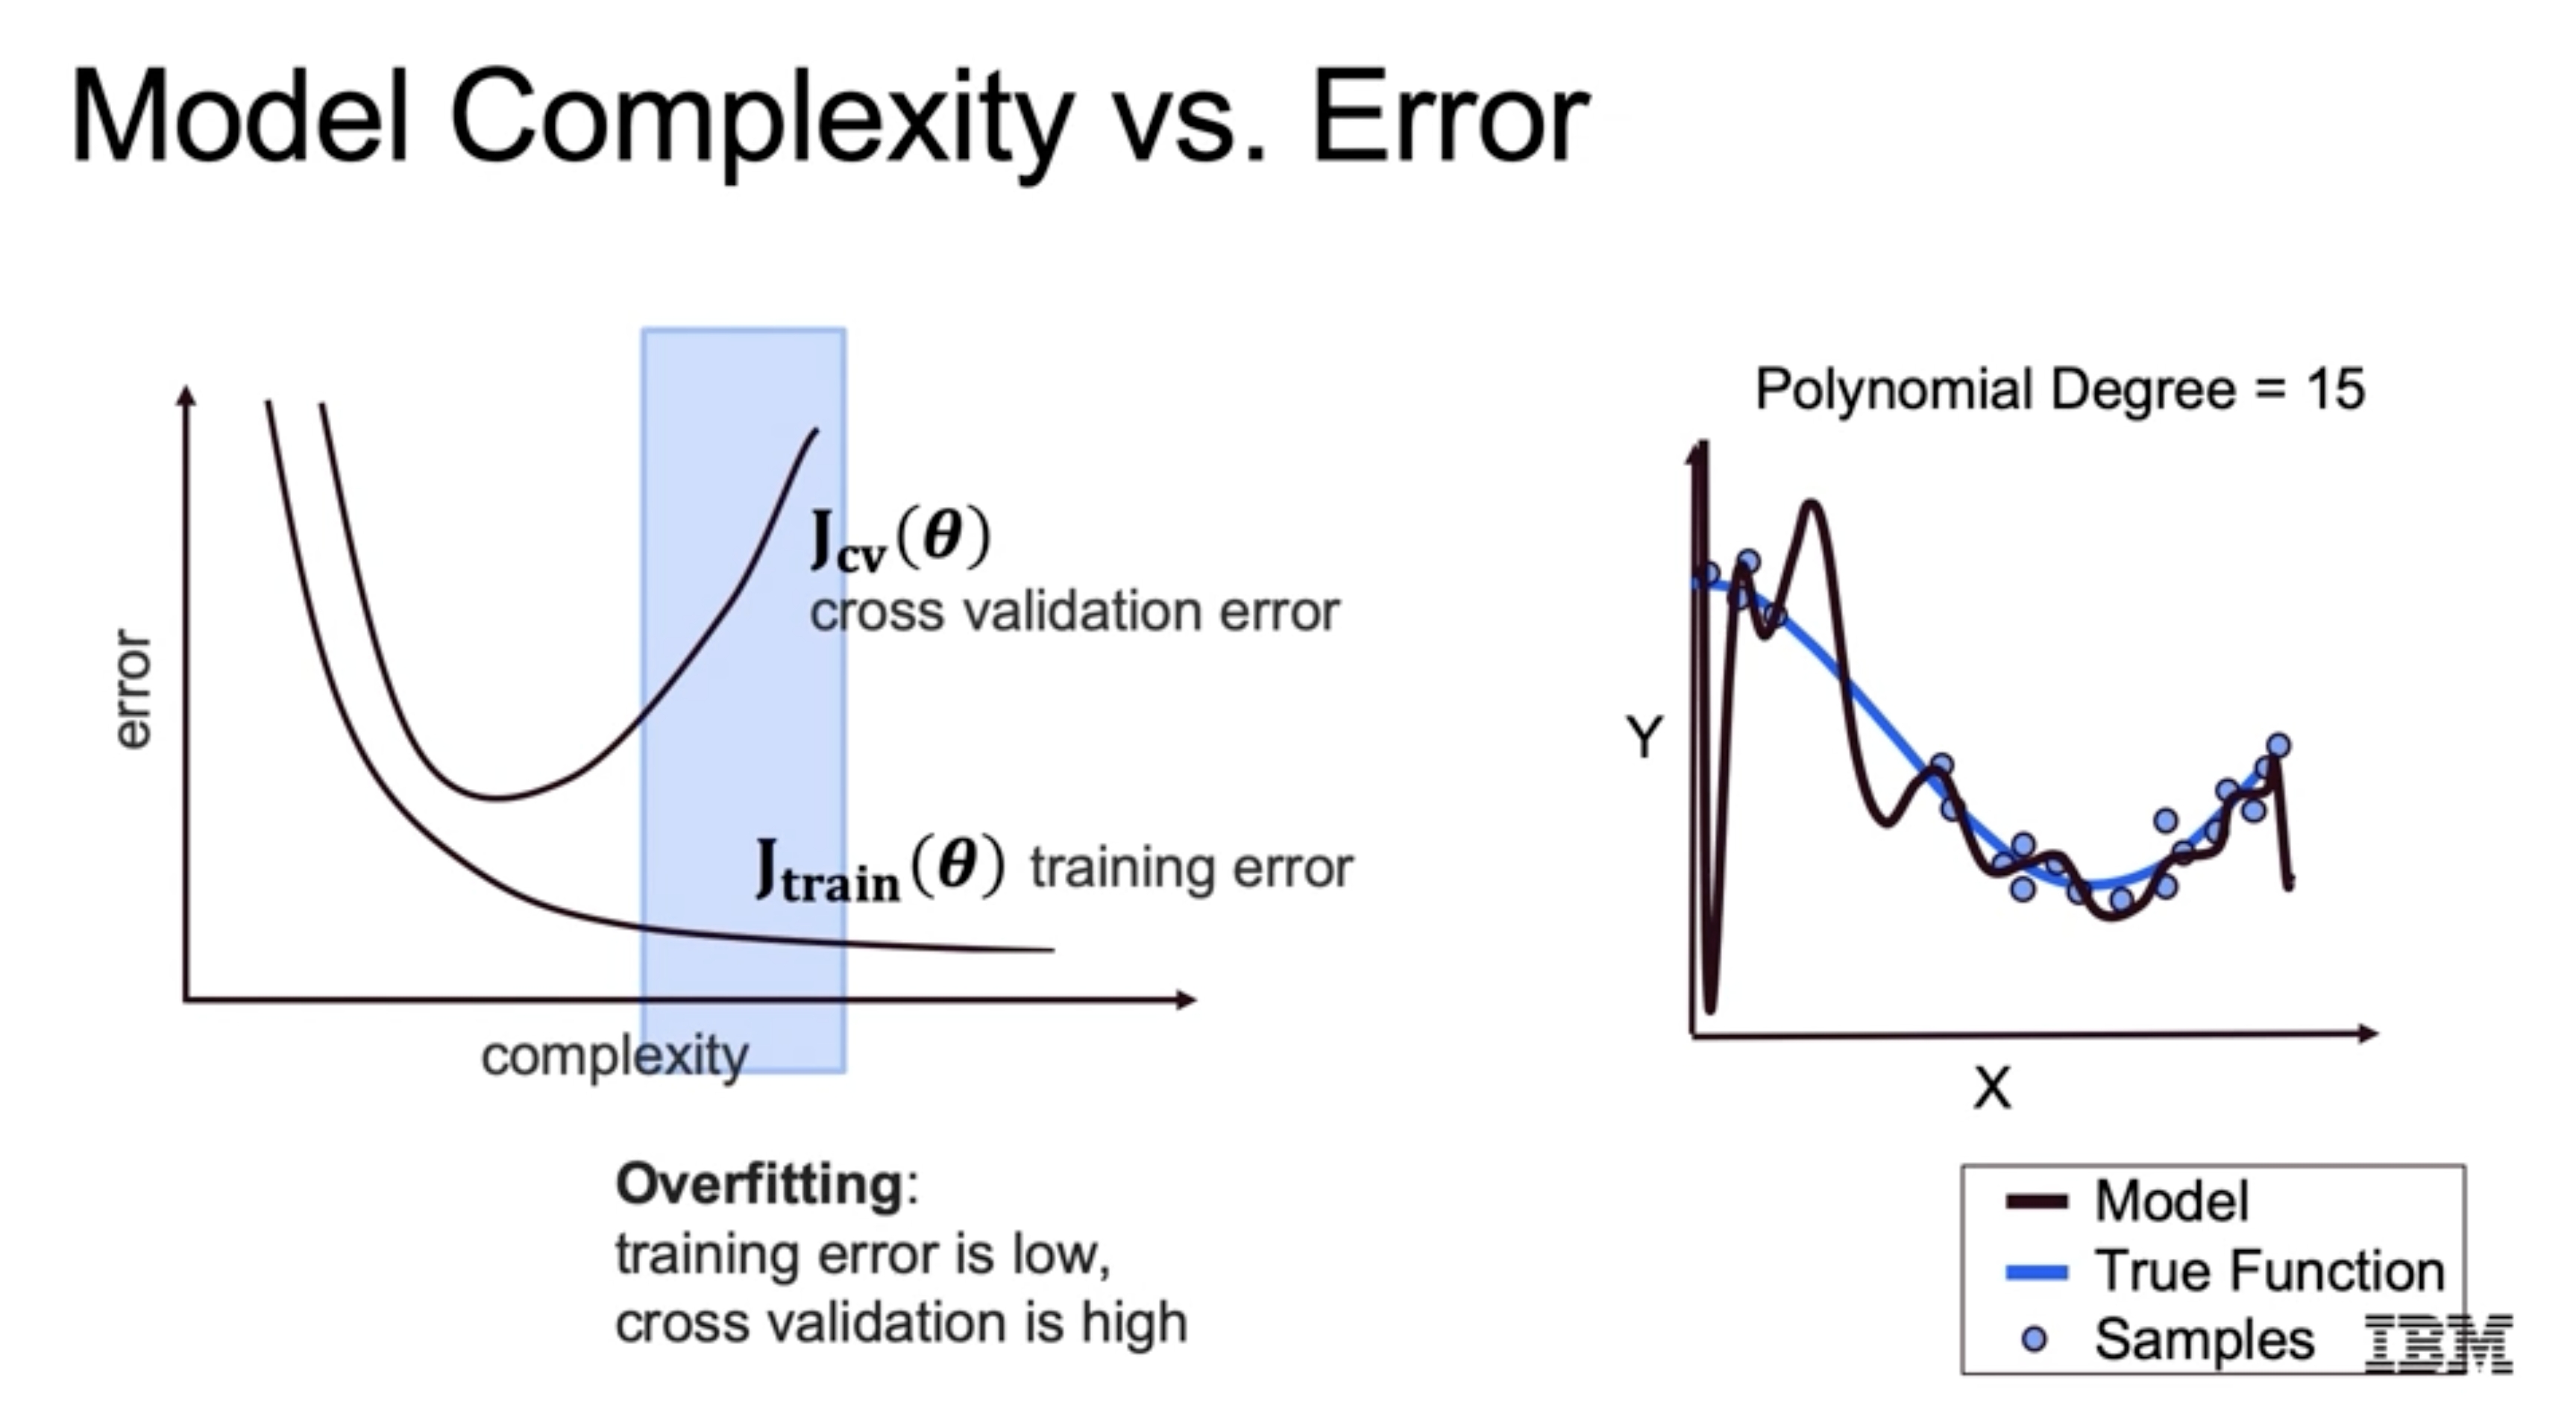

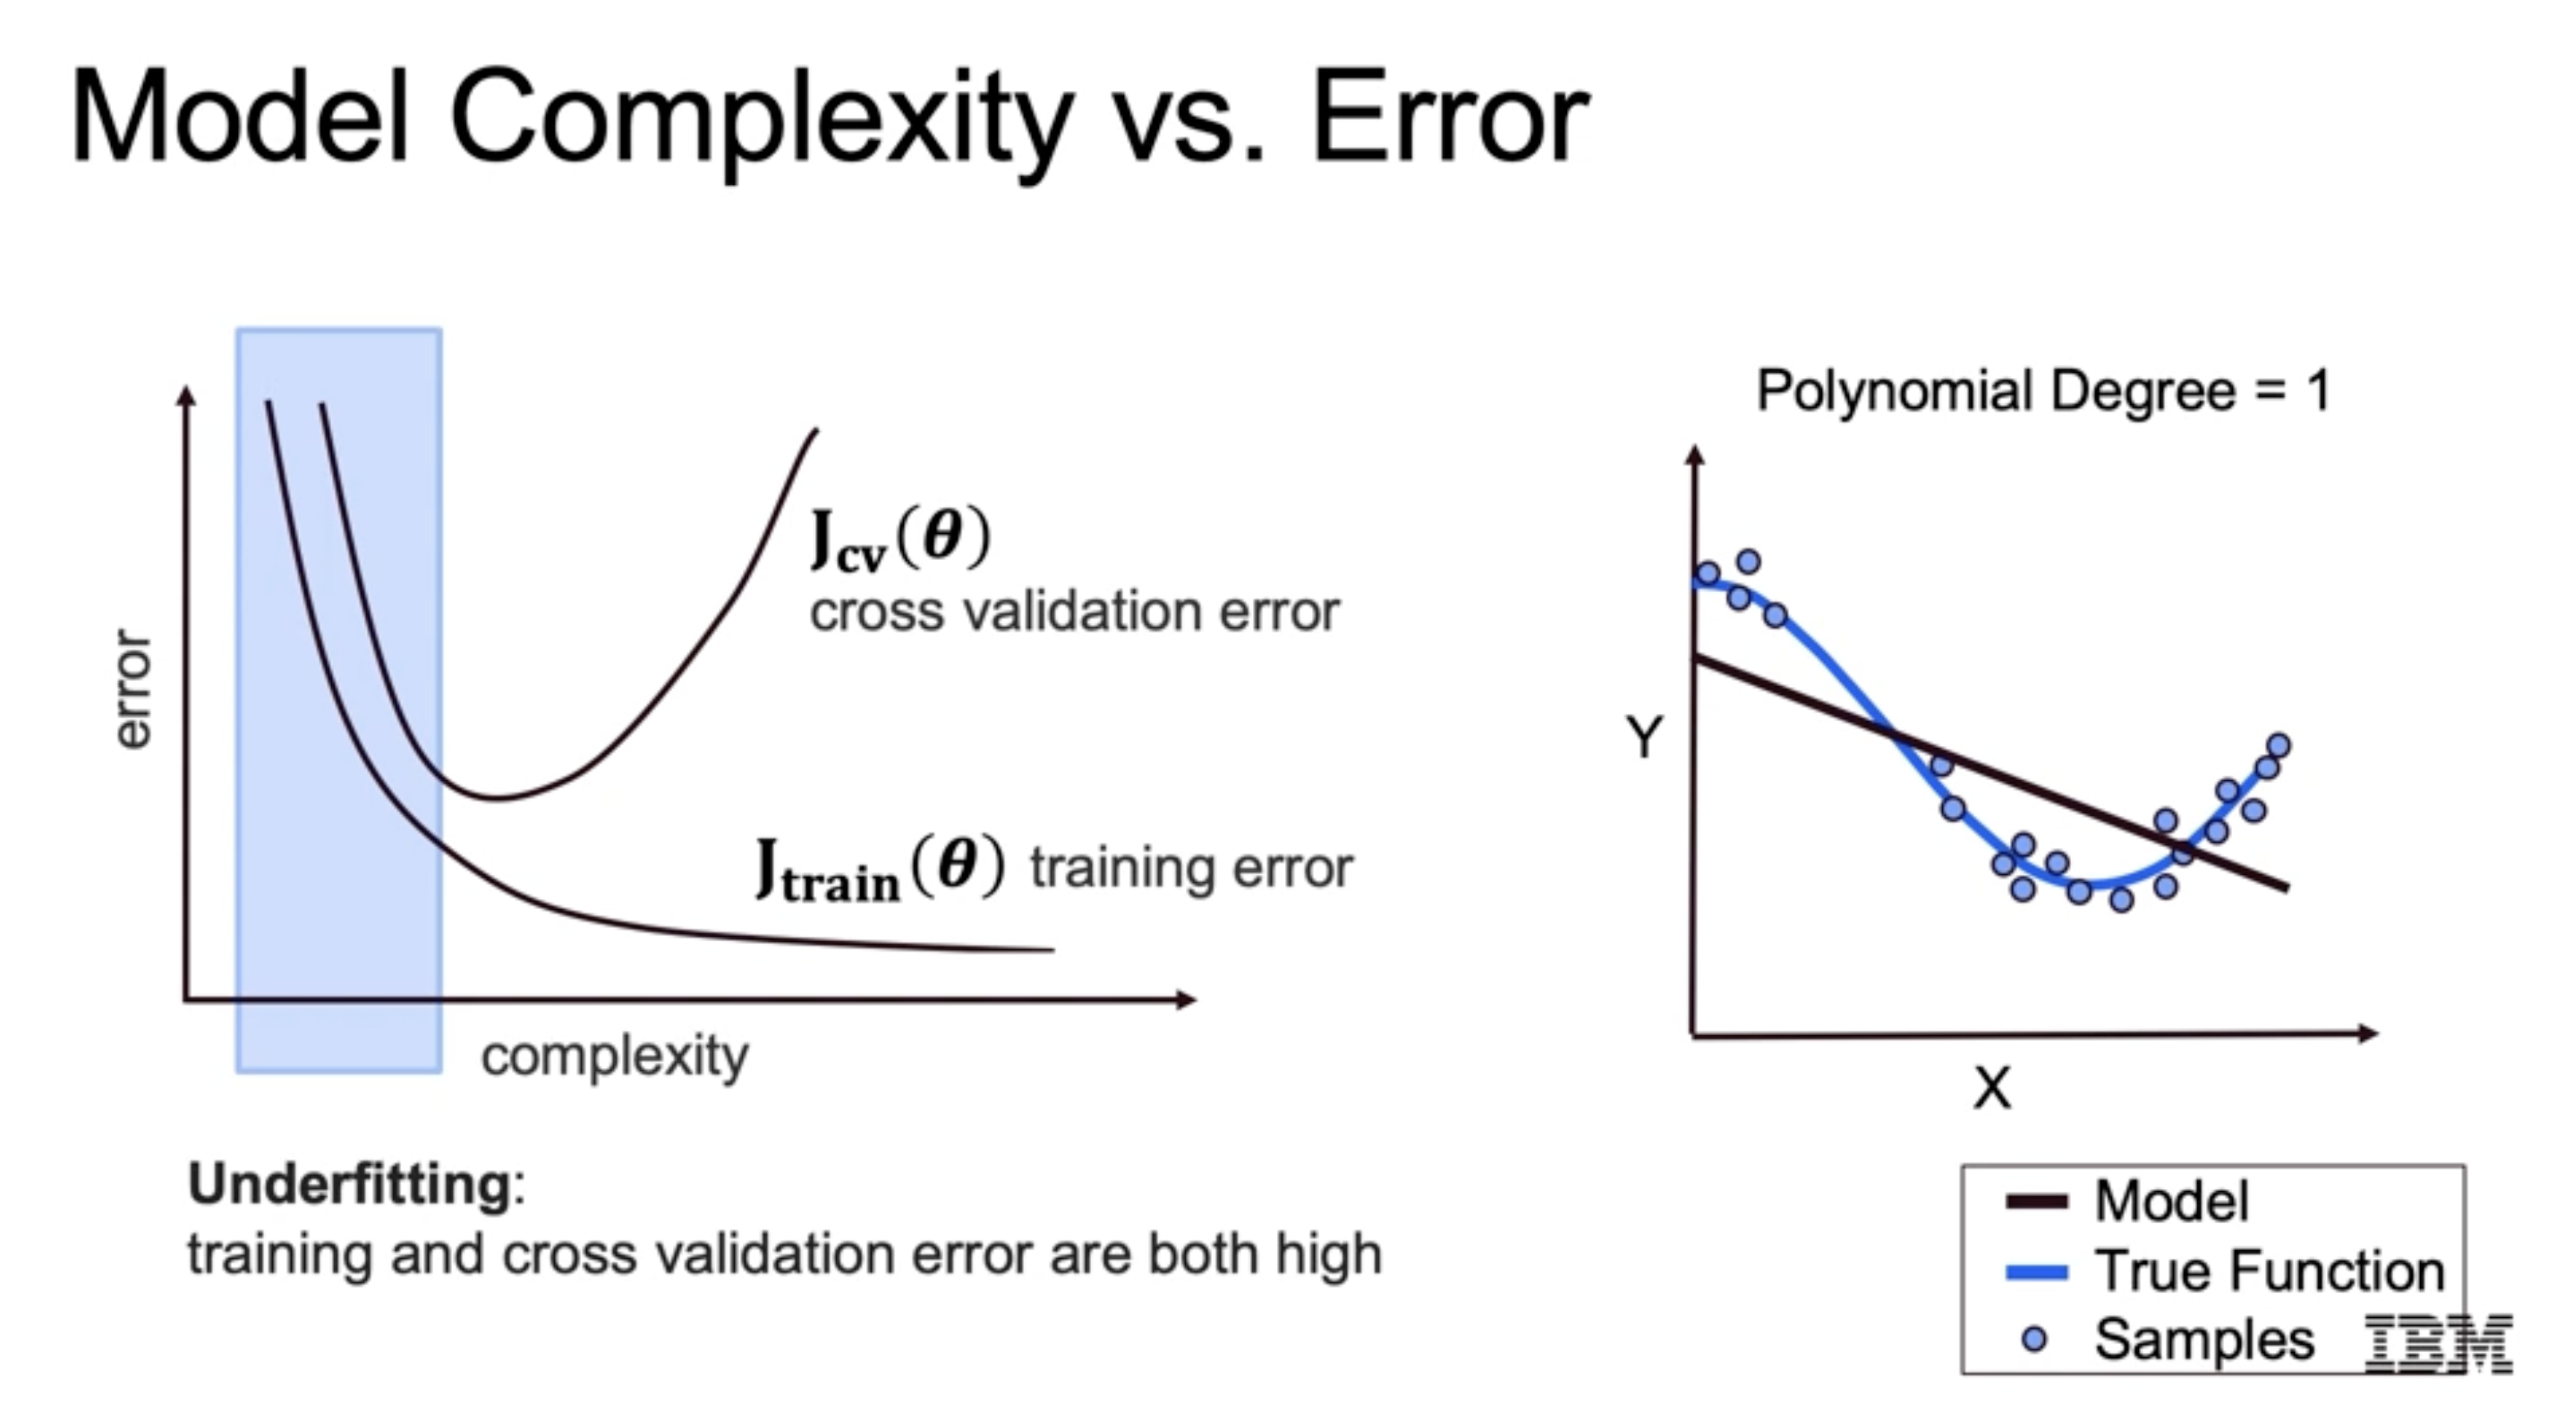

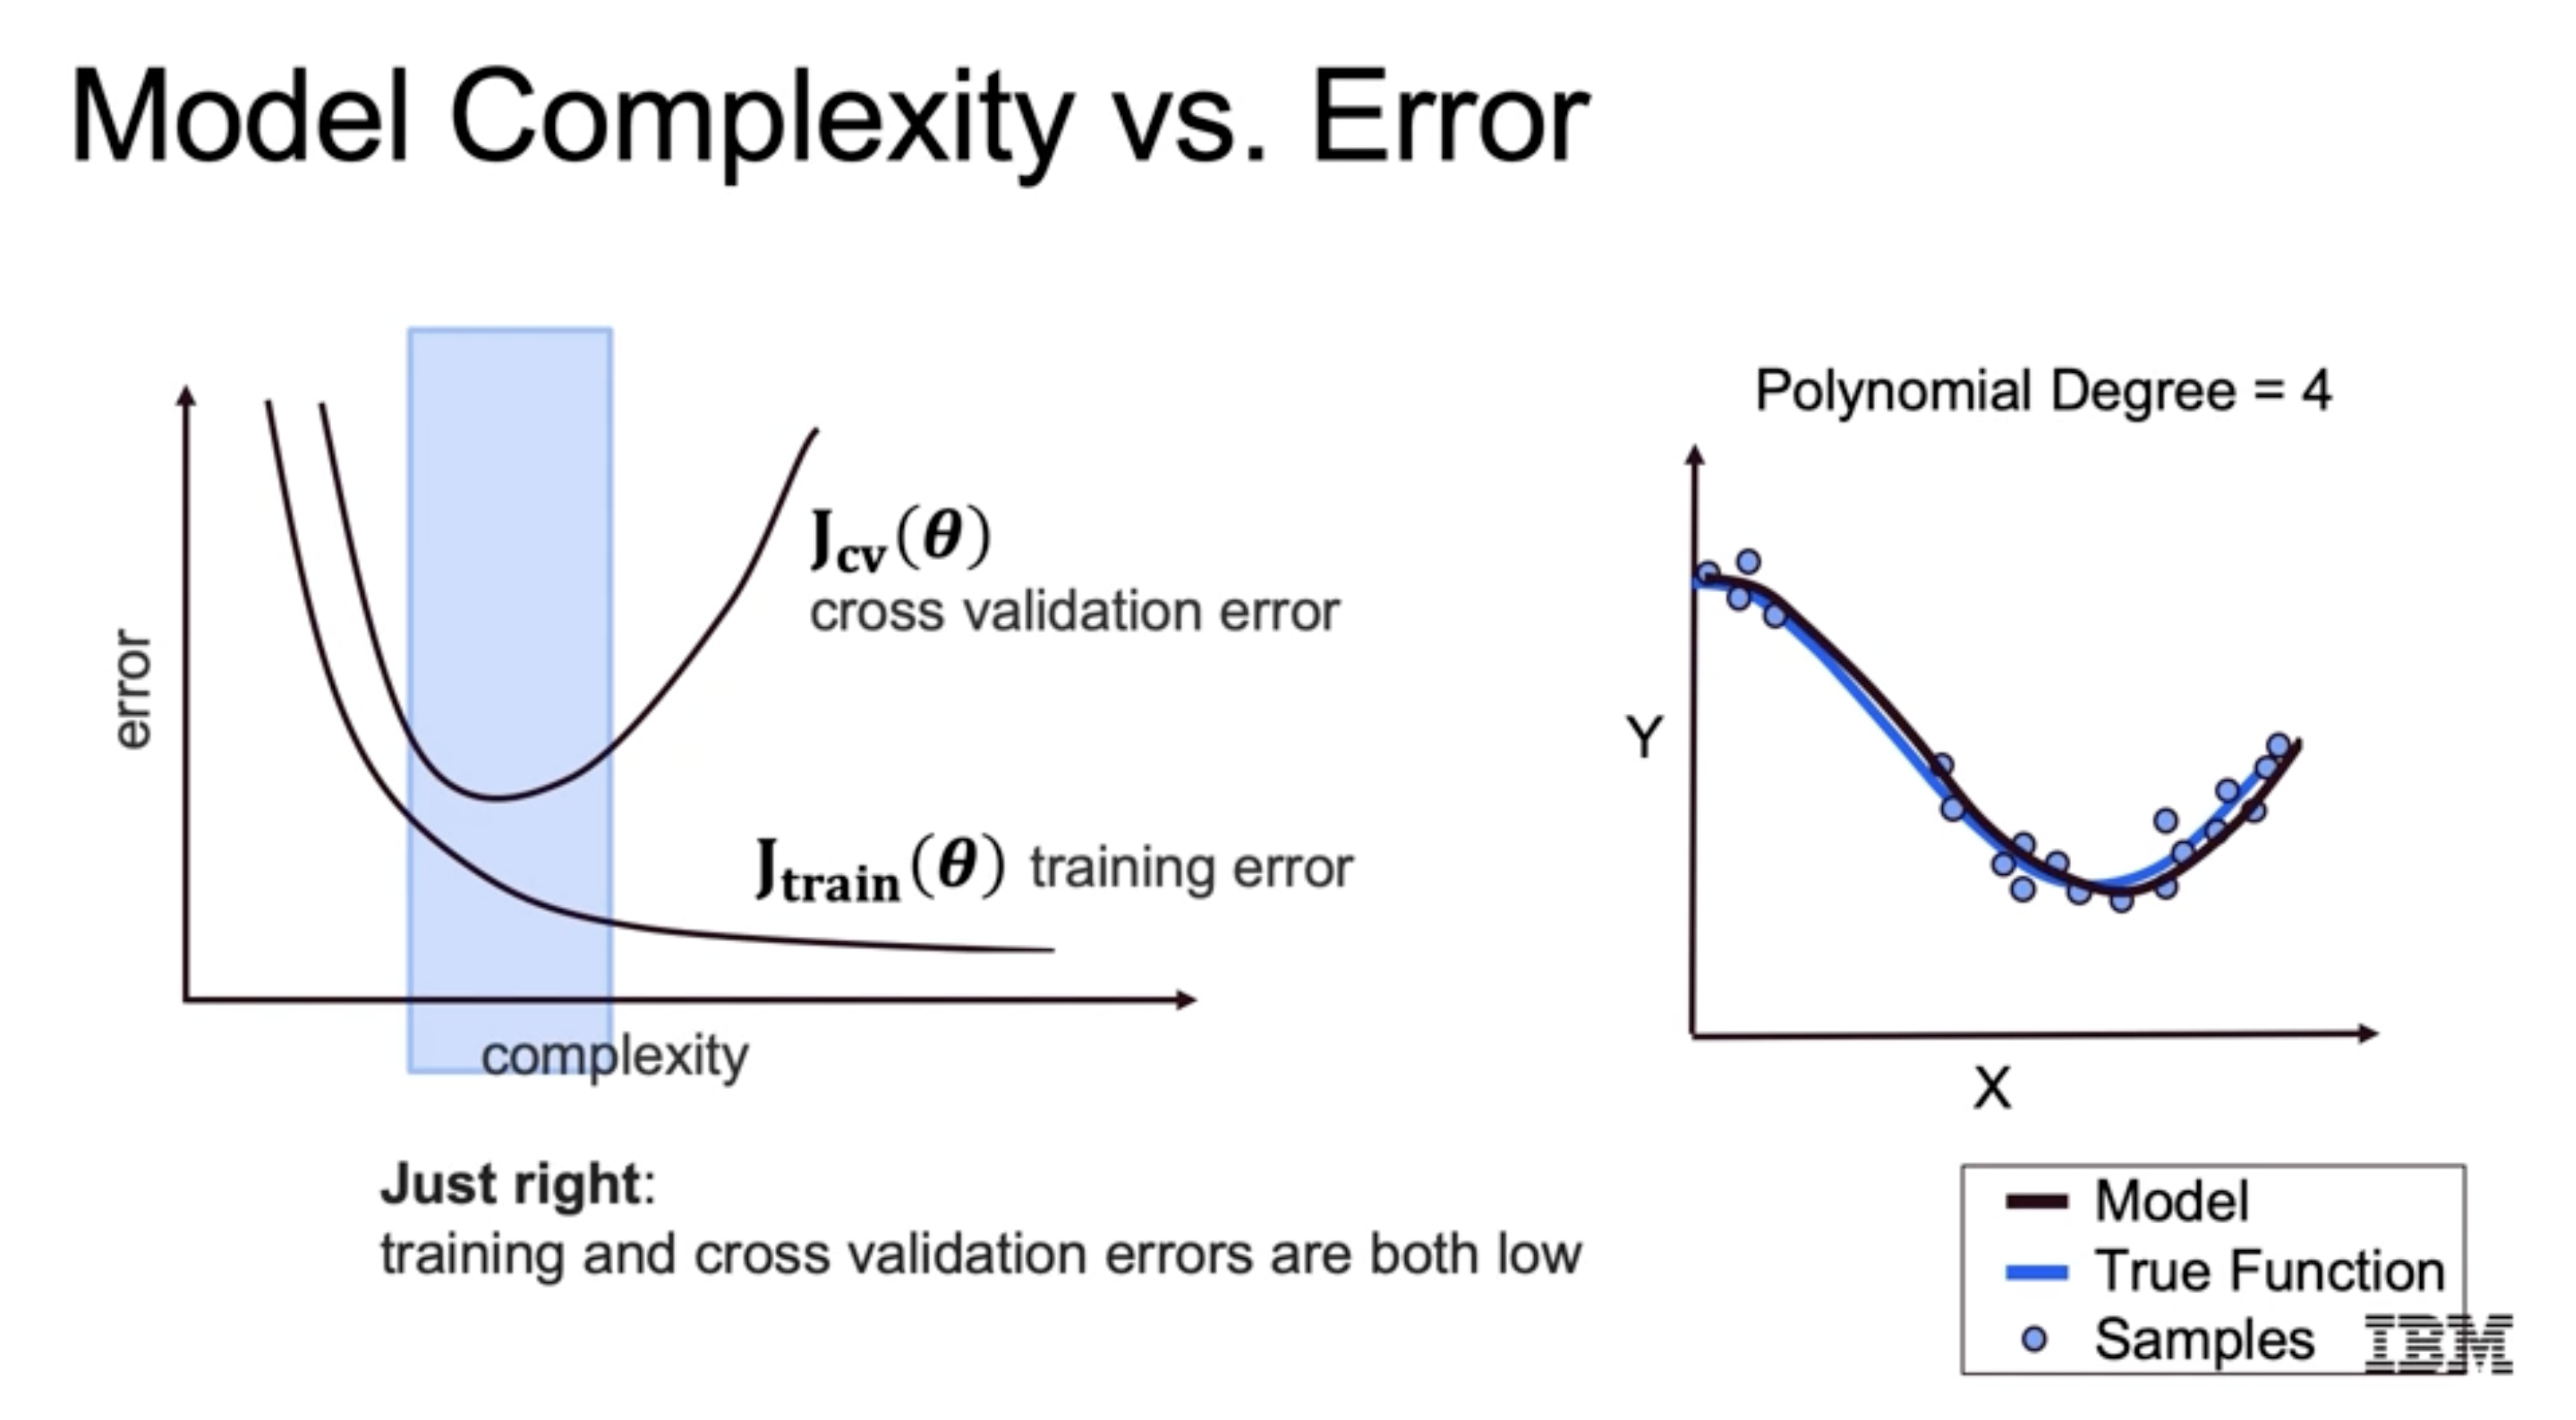

In [1]:
from IPython.display import Image, display

display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/Cross_validation_overfitting.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/Cross_validation_underfitting.png"))
display(Image(filename="/Users/cansezgin/Python-Output/SAMPLE_TRAINING_DATA/Cross_validation_justright.png"))

* **K-fold Cross Validation**: Using each of ***k*** subsamples as a test sample.
* **Leave One Out Cross Validation:** Using each observation as a test sample.
* **Stratified Cross Validation:** K-fold Cross Validation with ***representative*** samples.


In [2]:
# Import the cross-validation function

from sklearn.model_selection import cross_val_score

Consider a real-world scenario where we build a regression model to predict house prices based on factors like square footage, number of bedrooms, and neighborhood. When using k = 10, the model trains on 90% of the data and tests on 10% in each iteration. Since each training set is large and diverse, the model generalizes well to unseen data.

Fold 1: We train the model on a subset where houses with large square footage and many bedrooms are prevalent. The learned model may prioritize these features as crucial for predicting house prices.

Fold 2: We then train the model on a different subset where houses in a diverse neighborhood, regardless of square footage, tend to have higher prices. In this case, the learned model assigns more importance to the neighborhood than in Fold 1.

#### EXAMPLE

In [3]:
%pip install seaborn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [6]:
import os
import requests

filename = "boston_housing_clean.pickle"
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

# Download the dataset if it does not exist
if not os.path.exists(filename):
    response = requests.get(path)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

# Import pandas library
import pandas as pd

# Read the pickle file and assign it to variable "boston"
boston = pickle.load(open(filename, "rb"))

In [7]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [8]:
boston_data = boston['dataframe']
boston_description = boston['description']

In [9]:
boston_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [10]:
# The KFold object in SciKit Learn tells the cross validation object how to split up the data:

X = boston_data.drop('MEDV', axis = 1)
Y = boston_data.MEDV

In [11]:
kf = KFold(shuffle = True, random_state=72018, n_splits=3)

In [12]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:", test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] 169

Train index: [ 0  2  6  9 10 11 12 13 15 17] 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] 169

Train index: [0 1 2 3 4 5 6 7 8 9] 338
Test index: [10 11 12 13 18 20 21 24 28 31] 168



In [13]:
#from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        Y[train_index], 
                                        Y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.6719348798472773, 0.7485020059212355, 0.6976807323597758]

In [14]:
# scaling the data as we go through the folds

scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        Y[train_index], 
                                        Y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)

scores

[0.6719348798472713, 0.748502005921238, 0.6976807323597742]

In [15]:
# Pipeline lets you chain together multiple operators 
# on your data that both have a fit method.

s = StandardScaler()
lr = LinearRegression()

In [16]:
# Combine multiple processing steps into a Pipeline

estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [17]:
# cross_val_predict is a function that does K-fold cross validation,
# appropriately fitting and transforming at every step of the way.

kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [18]:
predictions = cross_val_predict(estimator, X, Y, cv=kf)

In [19]:
r2_score(Y,predictions)

0.7063531064161559

In [20]:
np.mean(scores) # almost identical

0.7060392060427612

In [21]:
# Hyperparameter tuning involves using cross validation (or train-test split) to determine 
# which hyperparameters are most likely to generate a model 
# that generalizes well outside of your sample.

alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [22]:
# The code below tunes the alpha hyperparameter for Lasso regression.

scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, Y, cv = kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)


In [23]:
list(zip(alphas, scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602442),
 (1e-06, 0.7063531882052064),
 (1e-05, 0.7063539165191506),
 (0.0001, 0.706361268093463),
 (0.001, 0.7064334670415461),
 (0.01, 0.7070865958083233),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884887)]

In [24]:
Lasso(alpha=1e-6).fit(X, Y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [25]:
Lasso(alpha=1.0).fit(X, Y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

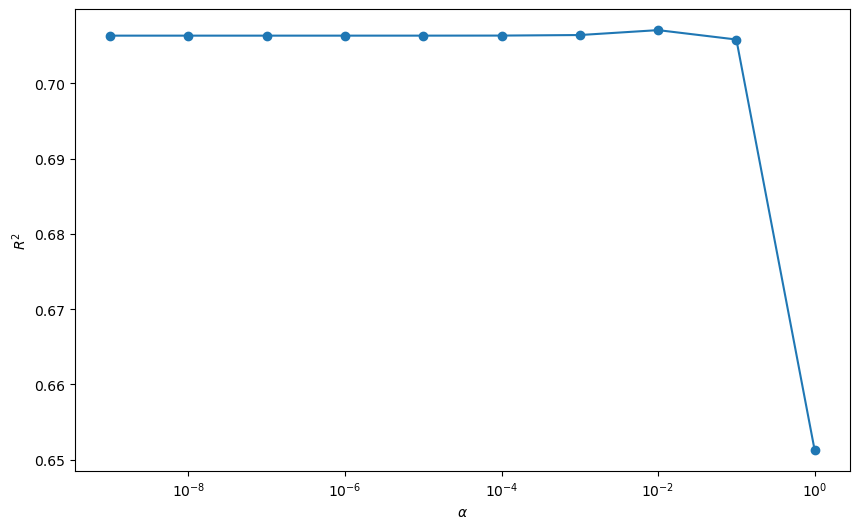

In [26]:
plt.figure(figsize = (10,6))
plt.semilogx(alphas, scores,'-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [27]:
# Add PolynomialFeatures to this Pipeline,
# and re-run the cross validation with the PolynomialFeatures added.

pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, Y, cv = kf)
    
    score = r2_score(Y, predictions)
    
    scores.append(score)

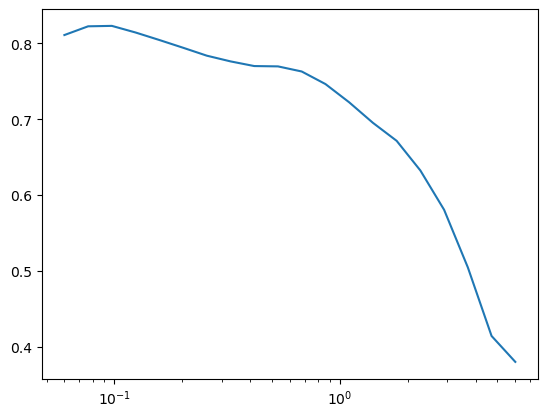

In [28]:
plt.semilogx(alphas, scores);

In [29]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, Y)
best_estimator.score(X, Y)

0.9134777735196521

In [30]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.00309168e+00,  3.32679107e+00, -1.01840878e+00,
       -2.56161421e+00,  1.12778302e+00, -1.72266155e+00, -5.37088506e-01,
        4.39555878e-01, -3.39542586e+00,  7.22387712e-02,  0.00000000e+00,
        0.00000000e+00,  3.53653554e+00, -0.00000000e+00,  3.72285440e-01,
        0.00000000e+00,  0.00000000e+00, -5.49528703e-01, -0.00000000e+00,
       -0.00000000e+00, -4.05522485e-02,  2.25864611e-01,  1.78508858e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.50874606e-02,
       -0.00000000e+00, -2.07295802e-01, -0.00000000e+00,  3.71781995e-01,
        0.00000000e+00, -0.00000000e+00, -5.89531100e-02,  3.47180625e-01,
        0.00000000e+00,  9.23666274e-01,  3.48873365e-01,  7.29463442e-02,
        0.00000000e+00,  0.00000000e+00,  7.68485586e-02, -7.21083596e-01,
        0.00000000e+00, -5.98542558e-01,  4.18420677e-01, -7.98165728e-01,
       -7.25062683e-01,  

In [31]:
# do the same for Ridge regression:

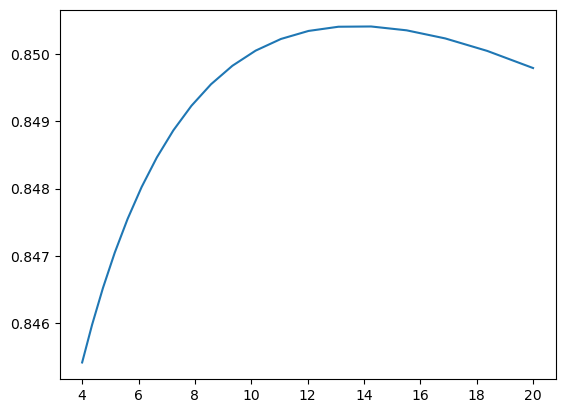

In [32]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, Y, cv = kf)
    score = r2_score(Y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

**Conclusion:** Both Lasso and Ridge with proper hyperparameter tuning give better results than plain ol' Linear Regression!

In [33]:
# Standardize the data
# Fit and predict on the entire dataset
# See what the largest coefficients were


# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, Y)
best_estimator.score(X, Y)

0.9134777735196521

In [34]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names_out(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [35]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [36]:
col_names_dict

{0: 'CRIM',
 1: 'ZN',
 2: 'INDUS',
 3: 'CHAS',
 4: 'NOX',
 5: 'RM',
 6: 'AGE',
 7: 'DIS',
 8: 'RAD',
 9: 'TAX',
 10: 'PTRATIO',
 11: 'B',
 12: 'LSTAT'}

In [37]:
df_importances.sort_values(by=1)

0         1
13     x12 -3.395426
8       x7 -2.561614
10      x9 -1.722662
94  x8 x12 -1.124408
72   x5 x8 -1.085987
..     ...       ...
9       x8  1.127783
79   x6 x8  1.363407
96  x9 x10  1.962870
6       x5  3.326791
17   x0 x3  3.536536

[105 rows x 2 columns]

To do cross-validation, use two techniques:
- use `KFolds` and manually create a loop to do cross-validation
- use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.

To do hyper-parameter tuning, see a general pattern:
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

- There is a function that does this for us -- `GridSearchCV`


In [38]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [39]:
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [40]:
grid.best_score_,grid.best_params_

(0.8504992740007816,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 15.511946948525646})

In [41]:
y_predict = grid.predict(X)

In [42]:
# this includes both in-sample and out-of-sample
r2_score(Y,y_predict)

0.9146985287463711

In [43]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00, -1.28829772e-01, -5.05856284e-03,  1.62658971e-02,
        1.00085587e-01, -9.67012834e-01,  3.25919745e+00, -9.57354081e-01,
       -1.94774304e+00,  8.47932375e-01, -1.00903101e+00, -7.09489284e-01,
        5.48320825e-01, -3.02796163e+00,  7.69588769e-02,  7.24274286e-02,
        6.75359501e-02,  1.70458885e+00, -4.76779943e-01,  5.72065384e-01,
        1.29769211e-01,  2.25908428e-01, -7.39176477e-01,  1.64401016e-01,
       -7.79048916e-02, -8.46238751e-02,  4.98683957e-01,  2.15472338e-01,
       -1.47172451e-01,  1.44110784e-01,  1.95181246e-01,  5.12046833e-02,
       -1.10854296e-01, -2.73868352e-01, -1.31082729e-01,  7.19564832e-01,
        5.48148586e-02,  8.81408420e-02, -2.65489851e-01,  5.80545185e-01,
        1.07454993e-01,  9.49069101e-01,  5.68679067e-01,  5.32690017e-01,
        6.98752649e-01, -5.91389648e-02,  7.43093700e-02, -4.26375257e-01,
        2.35823244e-01, -6.82554161e-01,  3.39870567e-01, -9.60949439e-01,
       -8.12827100e-01,  

In [44]:
grid.cv_results_

{'mean_fit_time': array([0.00304039, 0.00180189, 0.00225568, 0.00309102, 0.00211787,
        0.00093269, 0.00089876, 0.00089049, 0.00086959, 0.00084837,
        0.00082199, 0.00082088, 0.00084766, 0.00084233, 0.00085664,
        0.00084909, 0.00081627, 0.00083462, 0.0008293 , 0.00084583,
        0.00317272, 0.00326037, 0.00225147, 0.0041829 , 0.00264931,
        0.00454974, 0.00182621, 0.00219639, 0.00316238, 0.00288447,
        0.00217923, 0.0028615 , 0.00327404, 0.00199302, 0.00211008,
        0.00214672, 0.00519904, 0.00190028, 0.00214402, 0.00253709,
        0.00798106, 0.00657598, 0.00604192, 0.00630991, 0.0090301 ,
        0.00926439, 0.00750812, 0.00759721, 0.01080767, 0.00750637,
        0.00646369, 0.00788196, 0.00898528, 0.00727725, 0.00658115,
        0.0042874 , 0.00705036, 0.00507998, 0.01008034, 0.00808462]),
 'std_fit_time': array([8.09802602e-04, 9.55013157e-05, 5.33880086e-04, 9.69794259e-04,
        1.10183624e-03, 1.97537622e-05, 6.85865053e-06, 7.88585444e-06,
     

#### PRACTICE 2: CROSS VALIDATION

Cross validation method involves dividing the dataset into 3 parts:

*   **training set** - is a portion of the data used for training the model
*   **validation set** - is a portion of the data used to optimize the hyper-parameters of the model. This will     be illustrated in the next lab
*   **test set** - is a portion of the data used to evaluate if the model generalizes enough to work on the     
    data it was not trained on   

`Scikit Learn` library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover in this Jupyter Notebook are:

*   train_test_split - creates a single split into train and test sets
*   K-fold - creates number of k-fold splits, allowing cross validation
*   cross_val_score - evaluates model's score through cross validation

In [45]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer

In [47]:
import os
import requests

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv"
filename = "encoded_car_data.csv"

# Download the dataset if it does not exist
if not os.path.exists(filename):
    response = requests.get(path)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

# Import pandas library
import pandas as pd

# Read the file and assign it to variable "data"
data = pd.read_csv(filename)

# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
data.head(5)

The first 5 rows of the dataframe


diesel  gas  std  turbo  convertible  hardtop  hatchback  sedan  wagon  \
0     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
1     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
2     0.0  1.0  1.0    0.0          0.0      0.0        1.0    0.0    0.0   
3     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   
4     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   

   4wd  ...  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
1  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
2  0.0  ...       94.5      2823.0       152.0       2.68       154.0   
3  0.0  ...       99.8      2337.0       109.0       3.19       102.0   
4  1.0  ...       99.4      2824.0       136.0       3.19       115.0   

   carlength  carwidth  citympg  highwaympg    price  
0      168.8      64.1     21.0        27.0  13495.0  
1      168.8      64.1     21.0        27.0  16500.0  
2      171.2      65.5     19.0        26.0  16500.0  
3      176.6      66.2     24.0        30.0  13950.0  
4      176.6      66.4     18.0        22.0  17450.0  

[5 rows x 36 columns]

In [48]:
data.dtypes.value_counts()

float64    36
Name: count, dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [51]:
# split data into X and y

X = data.drop(columns=['price'])
y = data['price'].copy()

In [52]:
# TRAIN-TEST-SPLIT

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [53]:
# Model building

lr = LinearRegression()

In [57]:
# apply the LinearRegression() model, and fit() the X_train and  y_train training data.

lr.fit(X_train, y_train)

LinearRegression()

In [58]:
# To make predictions, 
# you need to use the test data set.
# apply predict() function on the testing data set.

predicted = lr.predict(X_test)

check some evaluation statistics, such as the coefficient of determination, $R^{2}$, using the built-in method `score` or  `r2_score`, and the Root Mean Square Error, RMSE, for which we can use the `mean_squared_error` method, MSE.

The $R^{2}$ statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [59]:
lr.score(X_train, y_train)

0.9262722224294516

Using the training data only, the $R^{2}$ is \~ 0.93. So, almost 93% of variability in the training data is explained by our model.

In [60]:
lr.score(X_test, y_test)

0.8471124710242095

Using the test data  $R^{2}$, we get \~0.85, not as good as the previous score.

In [62]:
# use r2_score method to calculate the $R^2$. It will provide the same result.

print(r2_score(y_true=y_test, y_pred=predicted))

0.8471124710242095


Now, let's calculate the RMSE. The smaller the RMSE number the better the model is.
Apply `mean_squared_error` to the `y_test` and the predicted data. Then, take a square root of the MSE, using `np.sqrt()` function.

In [63]:
mse = mean_squared_error(y_true=y_test, y_pred=predicted)
rmse = np.sqrt(mse)
rmse

3254.645517180221

In [64]:
# PREDICTION EXAMPLE:
# select some random data, using iloc and see some predicted versus actual values for the car prices.

some_data = X.iloc[:3]
some_labels = y.iloc[:3]

In [65]:
print("predictions:", lr.predict(some_data))

predictions: [13103.86103074 13103.86103074 15082.19838078]


In [66]:
print("Labels:", list(some_labels))

Labels: [13495.0, 16500.0, 16500.0]


In [67]:
predicted = lr.predict(X_test)
predicted

array([27653.38245478, 21441.31479663, 10767.8520039 , 12148.7512489 ,
       26101.40583166,  5426.80432933,  8110.27396556,  7548.58119614,
       10107.54515847,  9477.91117811, 17334.65744459,  7255.0697439 ,
       16452.09977343, 10813.14511416, 39693.32752751,  5540.30783255,
        2463.90575609, 15703.92568748, 10786.9743237 , 11454.56938014,
       10844.84454048, 15782.89095382, 10532.47553629,  3624.24154368,
        7009.01749952, 28652.67185132, 18375.06198727, 15177.15913222,
        4450.97616893, 16390.14301538, 26765.15308234,  5819.00498612,
        4887.02200307, 16631.17988369,  8385.97764569, 30408.88139306,
       12369.99549094, 12979.36921397,  6297.05599512, 16138.13949885,
        8143.22313381, 15099.30290869, 14726.74569321,  5250.90493393,
        6252.18654135,  9120.52487064,  5819.00498612,  7233.27501145,
       16689.33997987, 15561.36906637,  5043.85696648, 21859.00841174,
        7104.13996016, 11434.86263799,  4387.78965369, 16510.10892965,
      

now use the pipeline to run operations on the data: standardize the data then perform linear regression by applying the method.

In [69]:
pipe = Pipeline([('ss', StandardScaler()), ('lr', LinearRegression())])
pipe.fit(X_train, y_train)
pipe

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [70]:
# calculate the R squared

pipe.score(X_train, y_train)

0.9262722224294516

Using the training data only, the R squared is \~ 0.93.\
let's check the R squared on the test set.

In [71]:
pipe.score(X_test,y_test)

0.8419174509630336

The R squared is lower. This value provides more accurate evaluation of our model since we test our model on the 'unseen' data set.

Create a pipeline object called pipe1, replace standardization with normalization. Calculate the $R^{2}$ using the built-in method `score` and for RMSE, using `mean_squared_error` method.

In [72]:
pipe_1 = Pipeline([('nn', Normalizer() ),('lr', LinearRegression())])
pipe_1.fit(X_train, y_train)


Pipeline(steps=[('nn', Normalizer()), ('lr', LinearRegression())])

In [73]:
pipe_1.score(X_train, y_train)
pipe_1.score(X_test, y_test)

0.8755786122881466

In [74]:
pred = pipe_1.predict(X_test)

In [75]:
mse = mean_squared_error(y_true=y_test, y_pred=pred)
rmse = np.sqrt(mse)
rmse

2936.0617387188204

We have a list of features. Use the test data to select a feature with the best performance.

In [76]:
features = list(X)
features

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

We can train a linear regression model using each feature and use the test data to obtain the best feature.

In [77]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
    R_2.append(pipe.score(X_train[[feature]],y_train))

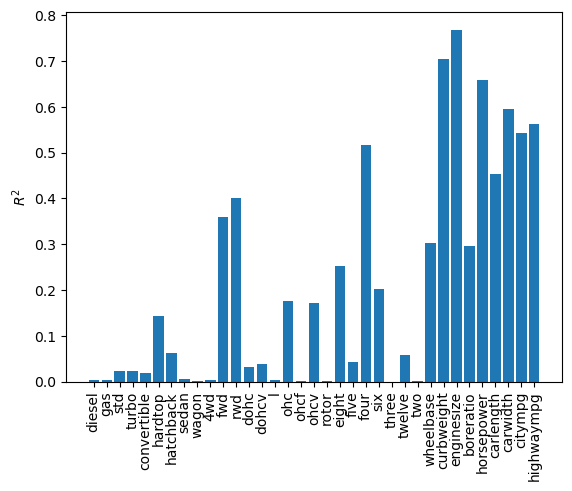

In [78]:
# plot the R2 for each feature.

plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

In [79]:
best=features[np.argmax(R_2)]
best

'enginesize'

'enginesize' is the feature that produces the highest $R^{2}$. We then train the feature that works best using all the data.

In [80]:
pipe.fit(X[[best]],y)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

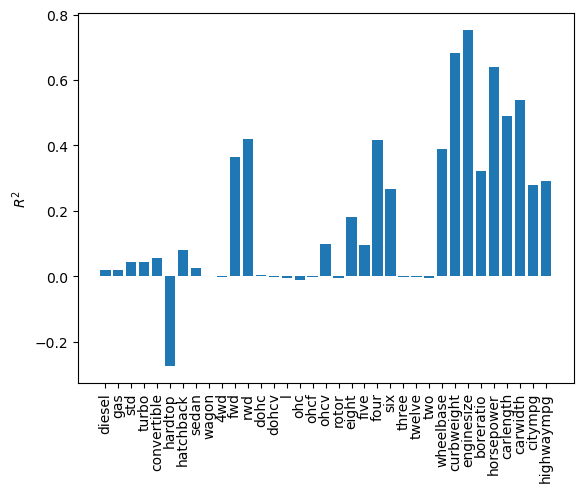

enginesize


In [82]:
# find the best feature using the test data, without standardization.

R_2=[]

for feature in features:
      lr.fit(X_train[[feature]], y_train)
      R_2.append(lr.score(X_test[[feature]],y_test))
best=features[np.argmax(R_2)]


plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()
best=features[np.argmax(R_2)]
print(best)

#### K-FOLD CROSS VALIDATION

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training.

In [83]:
N = len(X)
N

205

In [85]:
# create a linear regression object

lr = LinearRegression()

In [89]:
# calculate cross validation scores based on our testing sets.

scores = cross_val_score(lr, X, y, scoring ="r2", cv=3)

# Now, we have the R2 for each fold not used to train the model.

scores

array([ 0.81523496,  0.72623558, -0.08699892])

In [93]:
# calculate mean and standard deviation using the function of the scores:

def display_scores(scores, print_=False):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [ 0.81523496  0.72623558 -0.08699892]
Mean: 0.48482387480296163
Standard deviation: 0.40596896834096685


***The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.***

In [94]:
# compute the cross validation scores for 5 folds, 
# using the linear regression object lr and neg_mean_squared_error method for scoring.

scores = cross_val_score(lr, X, y, scoring ="neg_mean_squared_error", cv=5)
lr_scores = np.sqrt(-scores)
display_scores(lr_scores)

Scores: [ 3155.3045326  11357.74643812  3064.27761261  5629.10614669
  5559.42726809]
Mean: 5753.172399621843
Standard deviation: 3014.7388740732363


In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a KFold object that Provides train/test indices to split data into train/test sets in an iterative manner.

In [96]:
# create the KFold object kf, setting the number of splits to 2.

n_splits = 2
kf = KFold(n_splits = n_splits)

train the model using the `split(X,y)` method. It provides the train/test indices for `X` and `y`. Half the data is used for training in the first iteration, and the rest is used for testing and displaying the indexes for each set.  For the second iteration, the data used for training is used for testing, and the testing data is used for training. We store the $R^2$ for each iteration in the array  `R_2`. The `np.zeros()` function returns a new array of given shape and type, filled with zeros. Then, we calculate the $R^2$ for each of the X_train and X_test splits.

In [97]:
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]
    
    y_train, y_test=y[train_index],y[test_index]
    pipe.fit(X_train,y_train)
    n=+1
    R_2[k]=pipe.score(X_test, y_test)

TRAIN: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204]
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35


In [98]:
R_2.mean()

0.39093762153226613

In [99]:
# set the number of splits to three, we see 2/3's of the data is used for training.

n_splits=3
kf = KFold(n_splits = n_splits)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]
    
    y_train, y_test=y[train_index],y[test_index]
    pipe.fit(X_train,y_train)
    n=+1
    R_2[k]=pipe.score(X_test, y_test)
    
    
R_2.mean()

TRAIN: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204]
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  

0.4771934145169294

In [100]:
# randomly select samples by setting shuffle to True in the KFold constructor.

n_splits=3
kf = KFold(n_splits = n_splits,shuffle=True)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]


y_train, y_test=y[train_index],y[test_index]
pipe.fit(X_train,y_train)
n=+1
R_2[k]=pipe.score(X_test, y_test)

R_2.mean()

TRAIN: [  0   1   2   3   4   5   7  10  12  16  17  18  19  20  23  25  26  28
  30  31  32  33  34  35  37  38  40  41  45  47  48  49  51  52  53  54
  56  59  61  62  63  64  66  68  69  71  72  74  75  76  78  79  80  81
  83  85  87  89  90  91  92  93  96  98 101 103 104 108 109 110 112 113
 114 115 120 121 122 125 126 128 130 131 132 134 135 136 137 138 141 145
 146 147 148 149 150 151 152 153 155 156 157 158 160 162 163 164 165 166
 167 168 169 171 172 173 174 175 177 180 181 182 183 185 186 187 188 189
 192 193 194 196 197 199 200 201 202 203]
TEST: [  6   8   9  11  13  14  15  21  22  24  27  29  36  39  42  43  44  46
  50  55  57  58  60  65  67  70  73  77  82  84  86  88  94  95  97  99
 100 102 105 106 107 111 116 117 118 119 123 124 127 129 133 139 140 142
 143 144 154 159 161 170 176 178 179 184 190 191 195 198 204]
TRAIN: [  0   2   3   4   6   7   8   9  11  12  13  14  15  17  20  21  22  24
  26  27  28  29  32  34  36  37  38  39  40  41  42  43  44  45  46  47


0.30627525468469646